In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json

In [10]:
# load learned model
generator = model_from_json(open('../models/generator_model_bp_180.json').read())
generator.load_weights('../models/generator_weight_bp_180.h5')
discriminator = model_from_json(open('../models/discriminator_model_bp_180.json').read())
discriminator.load_weights('../models/discriminator_weight_bp_180.h5')

W1118 15:41:15.080651 140285713241856 deprecation_wrapper.py:119] From /home/hiroshi_koshimizu/miniconda3/envs/gan-research/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1118 15:41:15.081592 140285713241856 deprecation_wrapper.py:119] From /home/hiroshi_koshimizu/miniconda3/envs/gan-research/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1118 15:41:15.082221 140285713241856 deprecation_wrapper.py:119] From /home/hiroshi_koshimizu/miniconda3/envs/gan-research/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [13]:
discriminator.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (64, 1)              0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (64, 1, 10)          50          input_2[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (64, 10)             0           embedding_1[0][0]                
__________________________________________________________________________________________________
input_1 (InputLayer)            (64, 84, 8)          0                                            
__________________________________________________________________________________________________
repeat_vec

In [14]:
generator.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (64, 1)              0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (64, 1, 10)          50          input_4[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (64, 10)             0           embedding_2[0][0]                
__________________________________________________________________________________________________
input_3 (InputLayer)            (64, 84, 500)        0                                            
__________________________________________________________________________________________________
repeat_vec

In [ ]:
gen

In [2]:
original = np.load('/home/hiroshi_koshimizu/work/RCGAN/inputs/bp_data_84.npz', allow_pickle=True)
gen = np.load('/home/hiroshi_koshimizu/work/RCGAN/ipynbs_koshimizu/synthetic_bp_84.npz', allow_pickle=True)

In [3]:
original_df = pd.DataFrame([])
original_df['SBP_M'] = original['x'].transpose(0,2,1).reshape(-1, 6*84)[:, 84*5:].ravel().astype('float32')
original_df['DBP_M'] = original['x'].transpose(0,2,1).reshape(-1, 6*84)[:, 84*1:84*2].ravel().astype('float32')
original_df['PUL_M'] = original['x'].transpose(0,2,1).reshape(-1, 6*84)[:, 84*3:84*4].ravel().astype('float32')

In [4]:
gen_df = pd.DataFrame([])
gen_df['SBP_M'] = gen['x'].transpose(0,2,1).reshape(-1, 6*84)[:, 84*5:].ravel()
gen_df['DBP_M'] = gen['x'].transpose(0,2,1).reshape(-1, 6*84)[:, 84*1:84*2].ravel()
gen_df['PUL_M'] = gen['x'].transpose(0,2,1).reshape(-1, 6*84)[:, 84*3:84*4].ravel()

          SBP_M     DBP_M     PUL_M
SBP_M  1.000000  0.584670 -0.031962
DBP_M  0.584670  1.000000  0.236077
PUL_M -0.031962  0.236077  1.000000


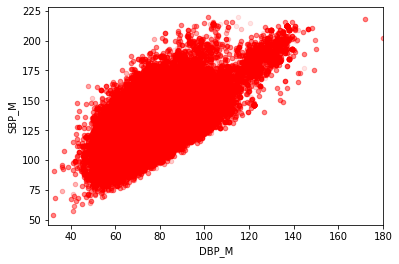

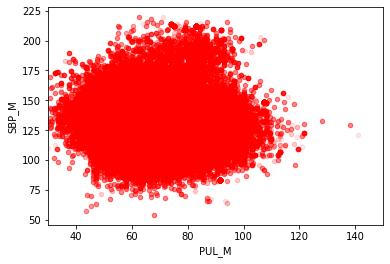

In [111]:
print(original_df.corr())
original_df.plot(kind = 'scatter', x = 'DBP_M', y = 'SBP_M', xlim = (30, 180), alpha = 0.1, c = 'r')
original_df.plot(kind = 'scatter', x = 'PUL_M', y = 'SBP_M', xlim = (30, 150), alpha = 0.1, c = 'r')

          SBP_M     DBP_M     PUL_M
SBP_M  1.000000  0.499022 -0.094325
DBP_M  0.499022  1.000000  0.186011
PUL_M -0.094325  0.186011  1.000000


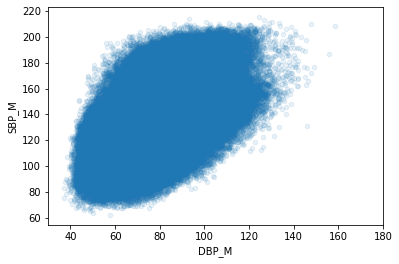

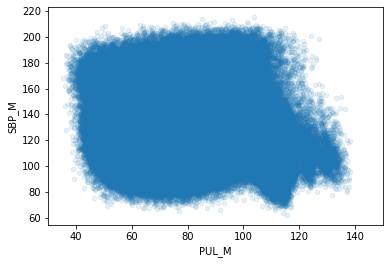

In [6]:
print(gen_df.corr())
gen_df.plot(kind = 'scatter', x = 'DBP_M', y = 'SBP_M', xlim = (30, 180), alpha = 0.1)
gen_df.plot(kind = 'scatter', x = 'PUL_M', y = 'SBP_M', xlim = (30, 150), alpha = 0.1)

In [74]:
def calc_bpv(data):
    tmp = pd.DataFrame(data['x'][:,:,5].astype('float').mean(axis =1), columns = ['mean_SBP_M'])
    tmp['std_SBP_M'] = data['x'][:,:,5].astype('float').std(axis =1)
    tmp['mean_SBP_E'] = data['x'][:,:,4].astype('float').mean(axis =1)
    tmp['std_SBP_E'] = data['x'][:,:,4].astype('float').std(axis =1)
    tmp['rstd_SBP_M'] = (data['x'][:,:,5].astype('float') - data['x'][:,:,5].astype('float').mean(axis =1).reshape(-1, 1)).std(axis = 1)
    #tmp['mean_DBP_M'] = data['x'][:,:,1].astype('float').mean(axis =1)
    #tmp['mean_PUL_M'] = data['x'][:,:,3].astype('float').mean(axis =1)
    tmp['std/mean_SBP_M'] = tmp['std_SBP_M'] / tmp['mean_SBP_M']
    tmp['std/mean_SBP_E'] = tmp['std_SBP_E'] / tmp['mean_SBP_E']
    return tmp

In [75]:
original_mean_df = calc_bpv(original)
gen_mean_df = calc_bpv(gen)

In [76]:
original_mean_df['M-E'] = original_mean_df['mean_SBP_M'] - original_mean_df['mean_SBP_E']
gen_mean_df['M-E'] = gen_mean_df['mean_SBP_M'] - gen_mean_df['mean_SBP_E']

In [86]:
print('ME差(mean) → gen:{}, oririnal:{}'.format( gen_mean_df['M-E'].mean(), original_mean_df['M-E'].mean()) )
print('ME差(std) → gen:{}, oririnal:{}'.format( gen_mean_df['M-E'].std(), original_mean_df['M-E'].std()) )
print('RSTD → gen:{}, oririnal:{}'.format( gen_mean_df['rstd_SBP_M'].mean(), original_mean_df['rstd_SBP_M'].mean()) )
print('std/mean_M → gen:{}, oririnal:{}'.format( gen_mean_df['std/mean_SBP_M'].mean(), original_mean_df['std/mean_SBP_M'].mean()) )

ME差(mean) → gen:6.11209170784747, oririnal:7.047134497835018
ME差(std) → gen:7.440501307562354, oririnal:9.702887596692328
RSTD → gen:10.952170200947938, oririnal:8.024766991340256
std/mean_M → gen:0.08665702113557022, oririnal:0.06300407981321361


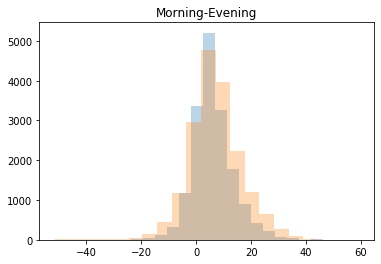

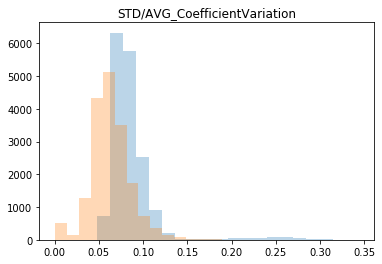

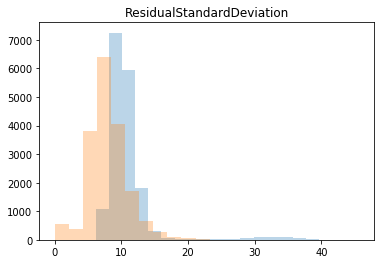

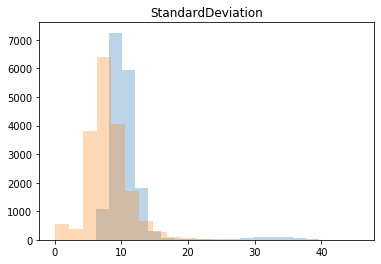

In [113]:
plt.hist(gen_mean_df['M-E'],alpha = 0.3, bins =20)
plt.hist(original_mean_df['M-E'],alpha = 0.3, bins =20)
plt.title('Morning-Evening')
plt.show()

plt.hist(gen_mean_df['std/mean_SBP_M'],alpha = 0.3, bins =20)
plt.hist(original_mean_df['std/mean_SBP_M'],alpha = 0.3, bins =20)
plt.title('STD/AVG_CoefficientVariation')
plt.show()

plt.hist(gen_mean_df['rstd_SBP_M'],alpha = 0.3, bins =20)
plt.hist(original_mean_df['rstd_SBP_M'],alpha = 0.3, bins =20)
plt.title('ResidualStandardDeviation')
plt.show()

plt.hist(gen_mean_df['std_SBP_M'],alpha = 0.3, bins =20)
plt.hist(original_mean_df['std_SBP_M'],alpha = 0.3, bins =20)
plt.title('StandardDeviation')
plt.show()